In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
uber = pd.read_csv("Uber Request Data.csv")

In [169]:
uber.shape

(6745, 6)

In [170]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [171]:
uber.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [172]:
sum(uber.duplicated(subset='Request id')) == 0

True

In [173]:
# Checking of NA values in DataFrame
print(uber.isnull().sum())

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


In [174]:
# checking % NAs column wise
print(uber.isnull().sum()*100/uber.shape[0])

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64


In [175]:
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'],dayfirst=True)
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'],dayfirst=True)

In [176]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [177]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [178]:
# Extract hour from request timestamp
hour = uber["Request timestamp"].dt.hour
hour.head()
hour.value_counts()
uber["hour"] = hour

In [179]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 7 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
hour                 6745 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 368.9+ KB


In [180]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


In [181]:
# Extract hour from drop timestamp
uber["rq_day"] = uber["Request timestamp"].dt.day


In [182]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,hour,rq_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13


In [183]:
# Extract hour from drop timestamp
uber["month"] = uber["Request timestamp"].dt.month

In [184]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,hour,rq_day,month
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,7
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,7
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,7
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,7
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,7


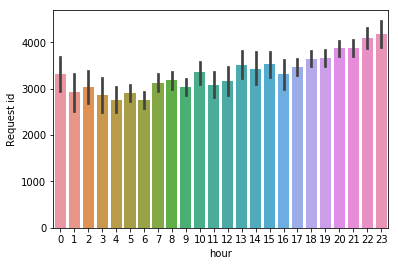

In [185]:
# bar plot of request id and hours
sns.barplot(x='hour', y='Request id', data=uber)
plt.show()

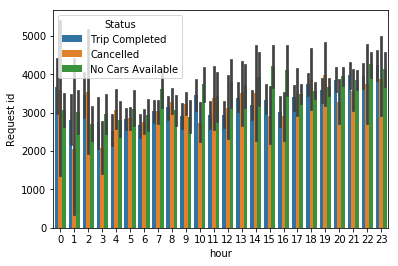

In [186]:
# bar plot of request id and status of the trip
sns.barplot(x='hour', y='Request id', hue='Status', data=uber )
plt.show()

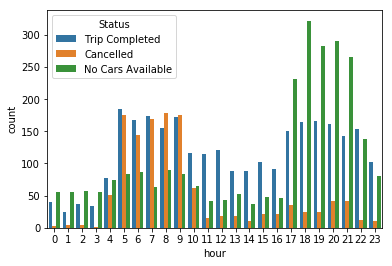

In [187]:
# count plot of hour wise and status wise count
sns.countplot(x='hour',  hue='Status', data=uber  )
plt.show()

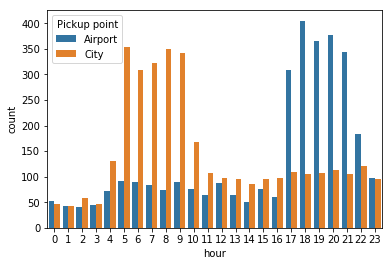

In [188]:
# count plot of hour wise and pickup point wise count
sns.countplot(x='hour',  hue='Pickup point', data=uber  )
plt.show()

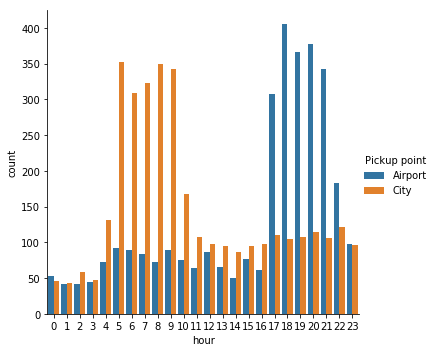

In [189]:
sns.catplot(x='hour', hue='Pickup point', data=uber, kind='count');

In [190]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,hour,rq_day,month
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,7
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,7
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,7
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,7
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,7


In [191]:
# creating time slots based on hour
def time_period(x):
    'divide day time into 4 categories'
    if x<5:
        return "early morning"
    elif 5 <= x < 10:
        return "morning peak"
    elif 10 <= x < 17:
        return "afternoon"
    elif 17 <= x < 22:
        return "evening peak"
    else:
        return "late night"
    
uber["time_slot"] = uber.hour.apply(lambda x: time_period(x))

In [192]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,hour,rq_day,month,time_slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,7,afternoon
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,7,evening peak
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,7,morning peak
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,7,evening peak
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,7,morning peak


In [193]:
uber.time_slot.value_counts()

evening peak     2342
morning peak     2103
afternoon        1224
early morning     578
late night        498
Name: time_slot, dtype: int64

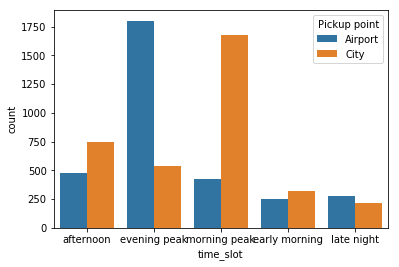

In [194]:
# count plot time slot wise request count
sns.countplot(x='time_slot',  hue='Pickup point', data=uber  )
plt.show()

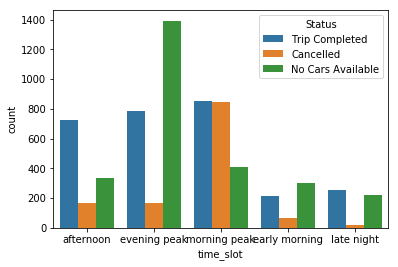

In [195]:
# time slot wise demand, supply and gap
sns.countplot(x='time_slot',  hue='Status', data=uber  )
plt.show()

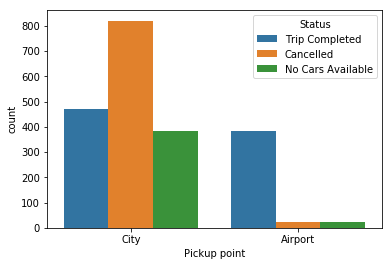

In [196]:
# demand and supply in morning peak hour 
uber_morning_peak = uber[uber.time_slot == "morning peak"]
sns.countplot(x="Pickup point", hue="Status", data = uber_morning_peak)
plt.show()


In [197]:
# severity of problem in city in morning
uber_morning_cancelled = uber_morning_peak.loc[(uber_morning_peak["Pickup point"] == "City") & (uber_morning_peak["Status"] == "Cancelled")]
len(uber_morning_cancelled.index)

820

In [198]:
# severity of problem in airport in morning
uber_morning_cancelled = uber_morning_peak.loc[(uber_morning_peak["Pickup point"] == "Airport") & (uber_morning_peak["Status"] == "Cancelled")]
len(uber_morning_cancelled.index)

23

In [199]:
# trips completed in city in morning
uber_morning_cancelled = uber_morning_peak.loc[(uber_morning_peak["Pickup point"] == "City") & (uber_morning_peak["Status"] == "Trip Completed")]
len(uber_morning_cancelled.index)

472

In [200]:
uber_city_morning_peak = uber_morning_peak.loc[(uber_morning_peak["Pickup point"] == "City")]
len(uber_city_morning_peak.index)


1677

In [201]:
uber_airport_completed_morning_peak = uber_morning_peak.loc[(uber_morning_peak["Pickup point"] == "Airport") & (uber_morning_peak["Status"] == "Trip Completed")]
len(uber_airport_completed_morning_peak.index)

382

In [202]:
uber_airport_morning_peak = uber_morning_peak.loc[(uber_morning_peak["Pickup point"] == "Airport")]
len(uber_airport_morning_peak.index)

426

In [203]:
uber_airport_morning_peak.to_csv("morning_peak.csv")

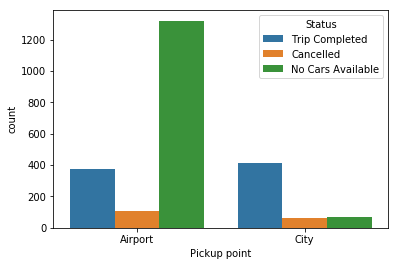

In [204]:
# supply & demand in evening rush hour
uber_evening_peak = uber[uber.time_slot == "evening peak"]
sns.countplot(x = "Pickup point", hue = "Status", data = uber_evening_peak)

In [205]:
# supply and demand in evening peak hour in the city
uber_city_completed_evening = uber_evening_peak.loc[(uber_evening_peak["Pickup point"] == "City") & (uber_evening_peak["Status"] == "Trip Completed")]
len(uber_city_completed_evening.index)

411

In [206]:
# supply and demand in evening peak hour from the airport
uber_airport_completed_evening = uber_evening_peak.loc[(uber_evening_peak["Pickup point"] == "Airport") & (uber_evening_peak["Status"] == "Trip Completed")]
len(uber_airport_completed_evening.index)

373

In [207]:
# severity problem (of demand and supply) at each location by looking at cancellation of cab in each of the pickup location in evening peak
uber_airport_cancelled_evening  = uber_evening_peak.loc[(uber_evening_peak["Pickup point"] == "Airport") & (uber_evening_peak["Status"] == "Cancelled")]
len(uber_airport_cancelled_evening.index)

106

In [208]:
uber_city_cancelled_evening  = uber_evening_peak.loc[(uber_evening_peak["Pickup point"] == "City") & (uber_evening_peak["Status"] == "Cancelled")]
len(uber_city_cancelled_evening.index)

60